In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(0,'..')
sns.set()

from torch.utils.data import DataLoader, Dataset, random_split, Subset
from transformers import RobertaTokenizerFast

from src.data_loading.datasets import BinaryTokenTSVDataset

# CoNLL-10

In [11]:
train_dataset = BinaryTokenTSVDataset(
    dataset_name="conll_10",
    tokenizer=RobertaTokenizerFast.from_pretrained("roberta-base", add_prefix_space=True),
    root_dir="/home/tom/Projects/multi-level-optimisation/",
    mode="train",
    token_label_mode="first",
    wi_locness_type="ABC",
    include_special_tokens=False,
    use_lowercase=True,
    max_sequence_length=512,
)

In [12]:
val_dataset = BinaryTokenTSVDataset(
    dataset_name="conll_10",
    tokenizer=RobertaTokenizerFast.from_pretrained("roberta-base", add_prefix_space=True),
    root_dir="/home/tom/Projects/multi-level-optimisation/",
    mode="dev",
    token_label_mode="first",
    wi_locness_type="ABC",
    include_special_tokens=False,
    use_lowercase=True,
    max_sequence_length=512,
)

In [13]:
def collate_fn(batch):
    sequences, labels, token_labels = [], [], []
    for sequence, label, token_label in batch:
        sequences.append(sequence)
        labels.append(label)
        token_labels.append(token_label)
    return sequences, labels, token_labels

In [27]:
train_loader = DataLoader(
    train_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn
)

val_loader = DataLoader(
    val_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn
)

In [36]:
sequence_lengths = []
positive_token_labels = []

for idx, (sequences, labels, token_labels) in enumerate(train_loader):
    for labels in token_labels:
        positive_token_labels.append(labels.count(1))
        sequence_lengths.append(len(labels))

for idx, (sequences, labels, token_labels) in enumerate(val_loader):
    for labels in token_labels:
        positive_token_labels.append(labels.count(1))
        sequence_lengths.append(len(labels))

sequence_lengths = np.array(sequence_lengths)
positive_token_labels = np.array(positive_token_labels)


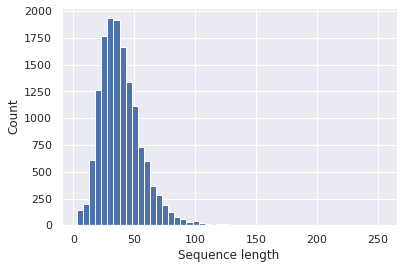

In [35]:
plt.hist(sequence_lengths, bins=50)
plt.xlabel("Sequence length")
plt.ylabel("Count")
plt.show()

In [38]:
num_samples = len(sequence_lengths)
num_negatives = sum(positive_token_labels==0)
num_positives = sum(positive_token_labels>0)

print(f"Number of samples: {num_samples}")
print(f"Number of negative samples: {num_negatives}")
print(f"Number of positive samples: {num_positives}")
print(f"Negative/positive ratio: {num_negatives/num_positives:.4f}")

Number of samples: 14541
Number of negative samples: 11921
Number of positive samples: 2620
Negative/positive ratio: 4.5500


# FCE

In [39]:
train_dataset = BinaryTokenTSVDataset(
    dataset_name="fce",
    tokenizer=RobertaTokenizerFast.from_pretrained("roberta-base", add_prefix_space=True),
    root_dir="/home/tom/Projects/multi-level-optimisation/",
    mode="train",
    token_label_mode="first",
    wi_locness_type="ABC",
    include_special_tokens=False,
    use_lowercase=True,
    max_sequence_length=512,
)

In [40]:
val_dataset = BinaryTokenTSVDataset(
    dataset_name="fce",
    tokenizer=RobertaTokenizerFast.from_pretrained("roberta-base", add_prefix_space=True),
    root_dir="/home/tom/Projects/multi-level-optimisation/",
    mode="dev",
    token_label_mode="first",
    wi_locness_type="ABC",
    include_special_tokens=False,
    use_lowercase=True,
    max_sequence_length=512,
)

In [41]:
def collate_fn(batch):
    sequences, labels, token_labels = [], [], []
    for sequence, label, token_label in batch:
        sequences.append(sequence)
        labels.append(label)
        token_labels.append(token_label)
    return sequences, labels, token_labels

In [42]:
train_loader = DataLoader(
    train_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn
)

val_loader = DataLoader(
    val_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn
)

In [43]:
sequence_lengths = []
positive_token_labels = []

for idx, (sequences, labels, token_labels) in enumerate(train_loader):
    for labels in token_labels:
        positive_token_labels.append(labels.count(1))
        sequence_lengths.append(len(labels))

for idx, (sequences, labels, token_labels) in enumerate(val_loader):
    for labels in token_labels:
        positive_token_labels.append(labels.count(1))
        sequence_lengths.append(len(labels))

sequence_lengths = np.array(sequence_lengths)
positive_token_labels = np.array(positive_token_labels)


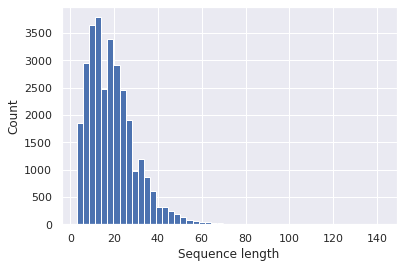

In [44]:
plt.hist(sequence_lengths, bins=50)
plt.xlabel("Sequence length")
plt.ylabel("Count")
plt.show()

In [45]:
num_samples = len(sequence_lengths)
num_negatives = sum(positive_token_labels==0)
num_positives = sum(positive_token_labels>0)

print(f"Number of samples: {num_samples}")
print(f"Number of negative samples: {num_negatives}")
print(f"Number of positive samples: {num_positives}")
print(f"Negative/positive ratio: {num_negatives/num_positives:.4f}")

Number of samples: 30541
Number of negative samples: 11142
Number of positive samples: 19399
Negative/positive ratio: 0.5744


# WI+LOCNESS

In [53]:
train_dataset = BinaryTokenTSVDataset(
    dataset_name="wi_locness",
    tokenizer=RobertaTokenizerFast.from_pretrained("roberta-base", add_prefix_space=True),
    root_dir="/home/tom/Projects/multi-level-optimisation/",
    mode="train",
    token_label_mode="first",
    wi_locness_type="ABC",
    include_special_tokens=False,
    use_lowercase=True,
    max_sequence_length=512,
)

In [54]:
def collate_fn(batch):
    sequences, labels, token_labels = [], [], []
    for sequence, label, token_label in batch:
        sequences.append(sequence)
        labels.append(label)
        token_labels.append(token_label)
    return sequences, labels, token_labels

In [55]:
train_loader = DataLoader(
    train_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn
)

In [56]:
sequence_lengths = []
positive_token_labels = []

for idx, (sequences, labels, token_labels) in enumerate(train_loader):
    for labels in token_labels:
        positive_token_labels.append(labels.count(1))
        sequence_lengths.append(len(labels))

sequence_lengths = np.array(sequence_lengths)
positive_token_labels = np.array(positive_token_labels)


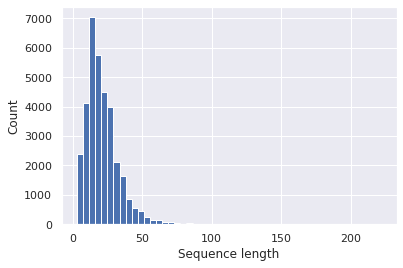

In [57]:
plt.hist(sequence_lengths, bins=50)
plt.xlabel("Sequence length")
plt.ylabel("Count")
plt.show()

In [58]:
num_samples = len(sequence_lengths)
num_negatives = sum(positive_token_labels==0)
num_positives = sum(positive_token_labels>0)

print(f"Number of samples: {num_samples}")
print(f"Number of negative samples: {num_negatives}")
print(f"Number of positive samples: {num_positives}")
print(f"Negative/positive ratio: {num_negatives/num_positives:.4f}")

Number of samples: 34308
Number of negative samples: 11329
Number of positive samples: 22979
Negative/positive ratio: 0.4930


# Toxic

In [46]:
train_dataset = BinaryTokenTSVDataset(
    dataset_name="toxic",
    tokenizer=RobertaTokenizerFast.from_pretrained("roberta-base", add_prefix_space=True),
    root_dir="/home/tom/Projects/multi-level-optimisation/",
    mode="train",
    token_label_mode="first",
    wi_locness_type="ABC",
    include_special_tokens=False,
    use_lowercase=True,
    max_sequence_length=512,
)

In [47]:
val_dataset = BinaryTokenTSVDataset(
    dataset_name="toxic",
    tokenizer=RobertaTokenizerFast.from_pretrained("roberta-base", add_prefix_space=True),
    root_dir="/home/tom/Projects/multi-level-optimisation/",
    mode="dev",
    token_label_mode="first",
    wi_locness_type="ABC",
    include_special_tokens=False,
    use_lowercase=True,
    max_sequence_length=512,
)

In [48]:
def collate_fn(batch):
    sequences, labels, token_labels = [], [], []
    for sequence, label, token_label in batch:
        sequences.append(sequence)
        labels.append(label)
        token_labels.append(token_label)
    return sequences, labels, token_labels

In [49]:
train_loader = DataLoader(
    train_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn
)

val_loader = DataLoader(
    val_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn
)

In [50]:
sequence_lengths = []
positive_token_labels = []

for idx, (sequences, labels, token_labels) in enumerate(train_loader):
    for labels in token_labels:
        positive_token_labels.append(labels.count(1))
        sequence_lengths.append(len(labels))

for idx, (sequences, labels, token_labels) in enumerate(val_loader):
    for labels in token_labels:
        positive_token_labels.append(labels.count(1))
        sequence_lengths.append(len(labels))

sequence_lengths = np.array(sequence_lengths)
positive_token_labels = np.array(positive_token_labels)


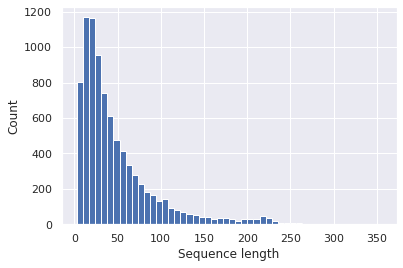

In [51]:
plt.hist(sequence_lengths, bins=50)
plt.xlabel("Sequence length")
plt.ylabel("Count")
plt.show()

In [52]:
num_samples = len(sequence_lengths)
num_negatives = sum(positive_token_labels==0)
num_positives = sum(positive_token_labels>0)

print(f"Number of samples: {num_samples}")
print(f"Number of negative samples: {num_negatives}")
print(f"Number of positive samples: {num_positives}")
print(f"Negative/positive ratio: {num_negatives/num_positives:.4f}")

Number of samples: 8610
Number of negative samples: 707
Number of positive samples: 7903
Negative/positive ratio: 0.0895
